# Life Expectancy Prediction

In [1]:
import pandas as pd

###### reading data

In [2]:
data = pd.read_csv('WHO.csv')

In [3]:
data

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2
5,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900,91.1,84.5
6,Argentina,Americas,41087,24.42,14.97,2.20,76,14.2,134.92,97.8,17130,0.0,0.0
7,Armenia,Europe,2969,20.34,14.06,1.74,71,16.4,103.57,99.6,6100,0.0,0.0
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,0.0,38110,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,0.0,42050,0.0,0.0


In [4]:
# checking missing values
data[data==0].count()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

# treating missing data

In [5]:
for i in data['Region'].unique():
    li = list(data[(data['FertilityRate'] == 0.0) & (data['Region'] == i)]['FertilityRate'].index )
    data['FertilityRate'][li] = data['FertilityRate'][data['Region']==i].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:

li = list(data[data['CellularSubscribers'] == 0].index)
data['CellularSubscribers'][li] = data['CellularSubscribers'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
li1 = list(data[data['GNI'] == 0].index)
data['GNI'][li1] = data.GNI.sum()/(194-32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
for i in data['Region'].unique():
    li = list(data[(data['LiteracyRate'] == 0.0) & (data['Region'] == i)]['LiteracyRate'].index )
    data['LiteracyRate'][li] = data['LiteracyRate'].sum()/(194-91)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# both columns correlated to literacy rate soo we drop these columns
data.drop(['PrimarySchoolEnrollmentMale','PrimarySchoolEnrollmentFemale'], axis = 1, inplace = True)

# treating string columns

In [10]:
# droping continuous string data
data.drop(['Country'], axis = 1, inplace = True)

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

In [13]:
from sklearn import preprocessing

In [14]:
# replacing strings of catagorical data to integer
encoder = preprocessing.LabelEncoder()
for i in data.columns:
    if isinstance(data[i][0], str):
        data[i] = encoder.fit_transform(data[i])

In [15]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,2,29825,47.42,3.82,5.400000,60,98.5,54.26,83.71068,1140.000000
1,3,3162,21.33,14.93,1.750000,74,16.7,96.39,93.46338,8820.000000
2,0,38482,27.42,7.17,2.830000,73,20.0,98.99,117.96349,8310.000000
3,3,78,15.20,22.86,1.661509,82,3.2,75.49,93.46338,13320.925926
4,0,20821,47.58,3.84,6.100000,51,163.5,48.38,70.10000,5230.000000


###### data visualisation

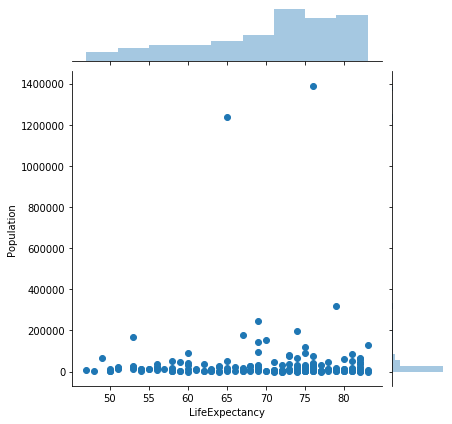

In [16]:
sns.jointplot(x='LifeExpectancy',y='Population',data=data)

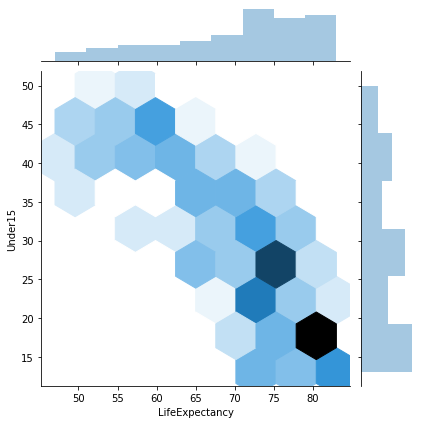

In [17]:
sns.jointplot(x='LifeExpectancy',y='Under15',data=data,kind='hex')

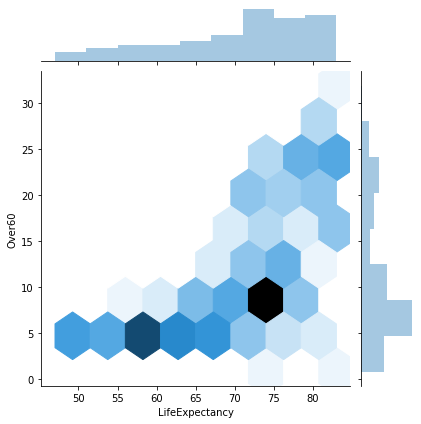

In [18]:
sns.jointplot(x='LifeExpectancy',y='Over60',data=data,kind='hex')

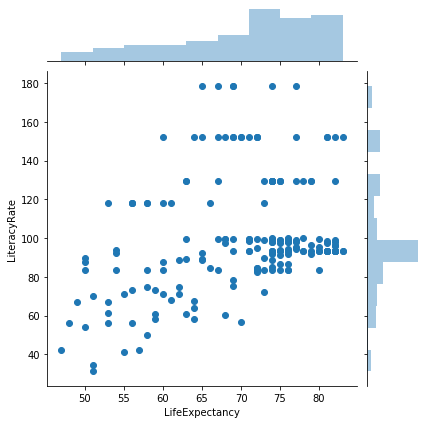

In [19]:
sns.jointplot(x='LifeExpectancy',y='LiteracyRate',data=data)

# checking accuracy

In [20]:
x = data.drop(['LifeExpectancy'], axis = 1)

In [21]:
y = data['LifeExpectancy']

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size = .5, random_state = 1)

In [23]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [24]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lm.score(test_x,test_y)*100

86.53042061290233

# treating outlyers

In [26]:
import matplotlib.pyplot as plt

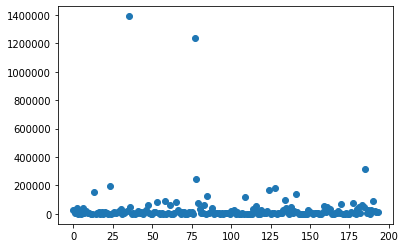

In [27]:
plt.scatter(data.Population.index,data.Population)

In [28]:
# using zscore to find outlyers
from scipy import stats
import numpy as np
li = list(data['Population'][np.abs(stats.zscore(data['Population']))>3].index)
li

[35, 77]

In [29]:
data['Population'][li] = data['Population'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,2,29825.0,47.42,3.82,5.400000,60,98.5,54.26,83.71068,1140.000000
1,3,3162.0,21.33,14.93,1.750000,74,16.7,96.39,93.46338,8820.000000
2,0,38482.0,27.42,7.17,2.830000,73,20.0,98.99,117.96349,8310.000000
3,3,78.0,15.20,22.86,1.661509,82,3.2,75.49,93.46338,13320.925926
4,0,20821.0,47.58,3.84,6.100000,51,163.5,48.38,70.10000,5230.000000


In [31]:
list(data['Under15'][np.abs(stats.zscore(data['Under15']))>3])

[]

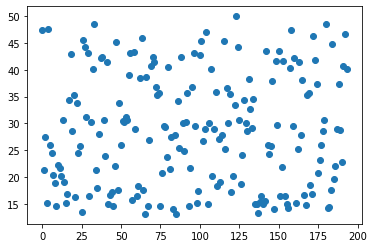

In [32]:
plt.scatter(data['Under15'].index,data['Under15'])

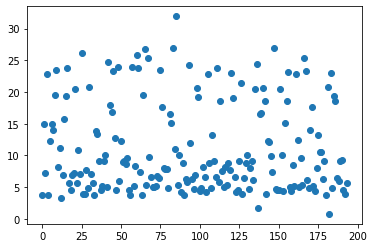

In [33]:
plt.scatter(data['Over60'].index,data['Over60'])

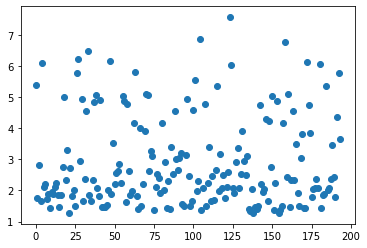

In [34]:
plt.scatter(data['FertilityRate'].index, data['FertilityRate'])

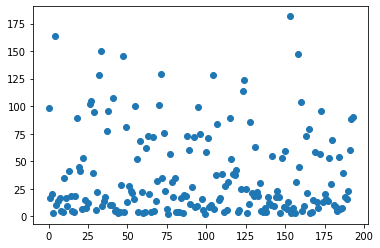

In [35]:
plt.scatter(data['ChildMortality'].index, data['ChildMortality'])

In [36]:
li = list(data['ChildMortality'][np.abs(stats.zscore(data['ChildMortality']))>3].index)
li

[4, 153]

In [37]:
from scipy import stats

In [38]:
li = list(data['ChildMortality'][np.abs(stats.zscore(data['ChildMortality'])>2)].index)
li

[4, 32, 33, 47, 71, 104, 123, 124, 153, 158]

In [39]:
data['ChildMortality'][li] = data['ChildMortality'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


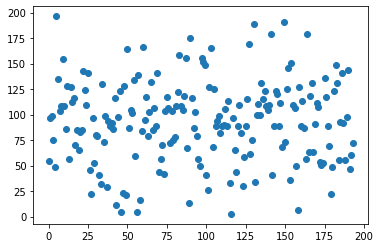

In [40]:
plt.scatter(data['CellularSubscribers'].index, data['CellularSubscribers'])

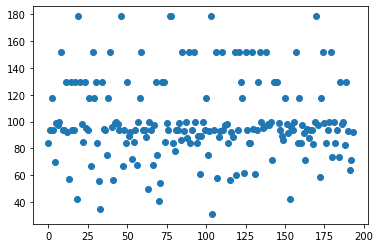

In [41]:
plt.scatter(data['LiteracyRate'].index, data['LiteracyRate'])

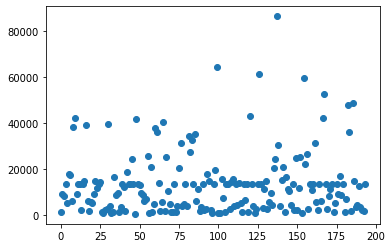

In [42]:
plt.scatter(data['GNI'].index, data['GNI'])

In [43]:
li = list(data['GNI'][np.abs(stats.zscore(data['GNI']))>4].index)
li

[137]

In [44]:
data['GNI'][li] = data['GNI'].sort_values().iloc[-2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# checking accuracy again

In [45]:
x = data.drop('LifeExpectancy', axis = 1)

In [46]:
y = data['LifeExpectancy']

In [47]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = .5, random_state = 1)

In [48]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lm.score(test_x,test_y)*100

79.61493224854618

# feature selection

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [51]:
x_vif = add_constant(x)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
pd.Series([variance_inflation_factor(x_vif.values,i) for i in range(x_vif.shape[1])], index = x_vif.columns)

const                  145.706223
Region                   1.617782
Population               1.016312
Under15                 17.915554
Over60                   3.847700
FertilityRate           10.569275
ChildMortality           2.765821
CellularSubscribers      1.818581
LiteracyRate             1.453581
GNI                      1.999163
dtype: float64

In [53]:
# using ANOVA for catagorical input data
stats.f_oneway(x['Region'],y)

F_onewayResult(statistic=10082.885411564352, pvalue=9.706078097650169e-279)

In [54]:
# using corelation coefficient for catagoriagal input data
# 'Region' will be removed
colm = list(x.columns)

In [55]:
colm.remove('Region')

In [56]:
colm

['Population',
 'Under15',
 'Over60',
 'FertilityRate',
 'ChildMortality',
 'CellularSubscribers',
 'LiteracyRate',
 'GNI']

In [57]:
corelation = pd.Series([np.abs(np.corrcoef(x[i],y))[0,1] for i in colm], index = colm)
corelation

Population             0.025215
Under15                0.836467
Over60                 0.688129
FertilityRate          0.831073
ChildMortality         0.820906
CellularSubscribers    0.610808
LiteracyRate           0.319418
GNI                    0.623156
dtype: float64

In [58]:
# droping population because of very low correlation coefficient
x.drop('Population', axis=1, inplace=True)

# checking accuracy

###### Linear regression

In [59]:
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = .5, random_state = 1)

In [60]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lm.score(test_x,test_y)*100

79.81045939326705

###### polynomial regression

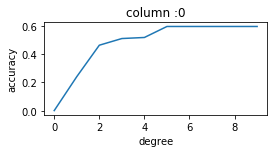

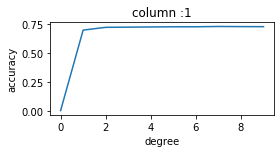

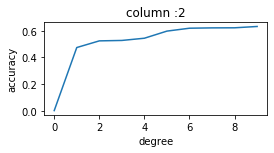

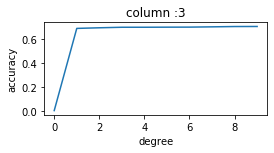

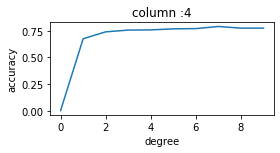

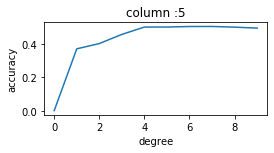

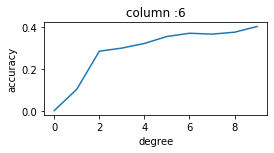

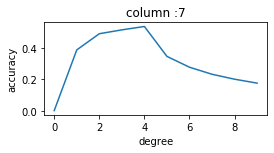

In [62]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
def check_exp(inp,degree,out):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(inp)
    
    lin2 = LinearRegression()
    lin2.fit(x_poly, out)
    
    return lin2.score(x_poly, out)

for i in range(x.shape[1]):
    acc = []
    for j in range(10):
        acc.append(check_exp(x.iloc[:,i].values.reshape(-1,1),j,y))
        
    import matplotlib.pyplot as plt
    plt.figure(figsize=(4,x.shape[1]*2))
    plt.subplot(x.shape[1],1,i+1)
    
    plt.title('column :'+str(i))
    plt.xlabel('degree')
    plt.ylabel('accuracy')
    plt.plot(acc)

In [63]:
l = [2,1,1,1,1,1,2,2]
len(l)

8

In [64]:
from sklearn.preprocessing import PolynomialFeatures
for i,j in zip(range(1,x.shape[1]+1),l):
    exec(f'poly{i} = PolynomialFeatures(degree = {j})')
    exec(f'X_{i} = poly{i}.fit_transform(x.iloc[:,{i}-1].values.reshape(-1,1))')

In [65]:
data2 = np.concatenate((X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8),axis=1)

In [66]:
train_X,test_X,train_y,test_y = train_test_split(data2,y, test_size=.3, random_state =1)

In [67]:
lm.fit(train_X,train_y)
lm.score(train_X,train_y)*100

81.64859089968306

In [68]:
lm.score(test_X,test_y)*100

84.09972974827559

###### xgbooster

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200,max_depth=4)

In [70]:
xgb.fit(train_X,train_y)

[17:11:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [71]:
xgb.score(train_X,train_y)*100

99.95411658938505

In [72]:
xgb.score(test_X,test_y)*100

87.50607999920781

###### random forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300,max_depth=3)

In [74]:
rfr.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [75]:
rfr.score(train_X,train_y)*100

92.32961745673063

In [76]:
rfr.score(test_X,test_y)*100

90.34563461158007

###### factors which are affecting life expectancy most

In [77]:
corelation

Population             0.025215
Under15                0.836467
Over60                 0.688129
FertilityRate          0.831073
ChildMortality         0.820906
CellularSubscribers    0.610808
LiteracyRate           0.319418
GNI                    0.623156
dtype: float64

In [ ]:
# Under15, FertilityRate and ChildMortality are affecting the most.